In [10]:
import numpy as np
import matplotlib.pyplot as plt
import rivapy.models as models
%matplotlib inline
#reload modules 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
heston = models.HestonModel(long_run_variance=0.2**2, 
                            mean_reversion_speed=2.0, 
                            vol_of_vol=0.1, 
                            initial_variance=0.1**2, 
                            correlation = -0.9, 
                            drift_stock=lambda x: 0)

In [50]:
n_sims = 100
S0 = 1.0

timegrid = np.linspace(0.0,1.0,120)
simulated_values = np.empty((n_sims, 2))
simulated_values[:,0] = S0
simulated_values[:,1] = heston._initial_variance

paths = np.empty((timegrid.shape[0], n_sims, 2))
paths[0] = simulated_values

t0 = timegrid[0]
np.random.seed(42)

for i in range(1,timegrid.shape[0]):
    rnd = np.random.normal(size=(n_sims,2))
    heston.apply_mc_step(simulated_values, t0, timegrid[i], rnd)
    paths[i] = simulated_values
    t0 = timegrid[i]

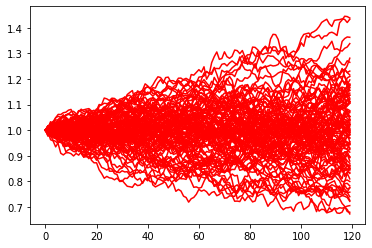

In [51]:
for i in range(paths.shape[1]):
    plt.plot(paths[:,i,0],'-r')
